# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Afifah
- **Email:** auliaafifah2205@gmail.com
- **ID Dicoding:** aulia_afifah_05uU

## Menentukan Pertanyaan Bisnis

- Apakah kondisi musim memengaruhi permintaan penyewaaan sepeda?
- Apakah kondisi cuaca memengaruhi permintaan penyewaan sepeda?
- Bagaimana perbandingan penyewaan sepeda dalam seminggu?
- Apakah ada pola khusus dalam permintaan sepeda berdasarkan waktu dalam sehari (misalnya, puncak permintaan pagi dan sore)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

Menampilkan 5 baris pertama dalam day_df

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/auliaafifah25/proyek_analisis_data/main/data/day.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan 5 baris pertama dalam hour_df

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/auliaafifah25/proyek_analisis_data/main/data/hour.csv")

In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**DAY_DF**

Melihat informasi yang berkaitan dengan day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Di atas menunjukkan ada kolom dteday yang menggunakan tipe data object, yang seharusnya menggunakan datetime untuk memudahkan ke tahap selanjutnya

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada nilai yang terduplikasi

**HOUR_DF**

Melihat informasi yang berkaitan dengan hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Di atas menunjukkan ada kolom dteday yang menggunakan tipe data object, yang seharusnya menggunakan datetime untuk memudahkan ke tahap selanjutnya

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada nilai yang terduplikasi

### Cleaning Data

Mengubah tipe object kolom dteday (day_df dan hour_df) menjadi datetime

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

kolom dteday pada day_df dan hour_df telah menjadi tipe data datetime

Mengubah tipe data pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit menjadi tipe data category (day_df dan hour_df)

In [18]:
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [19]:
season = {1:'Musim semi', 2:'Musim panas', 3:'Musim gugur', 4:'Musim dingin'}
day_df['season'] = day_df['season'].map(season)
hour_df['season'] = hour_df['season'].map(season)

In [20]:
yr = {0:2011, 1:2012}
day_df['yr'] = day_df['yr'].map(yr)
hour_df['yr'] = hour_df['yr'].map(yr)

In [21]:
mnth = { 1:'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli', 8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'}
day_df['mnth'] = day_df['mnth'].map(mnth)
hour_df['mnth'] = hour_df['mnth'].map(mnth)

In [22]:
holiday = {0:'Libur', 1:'Tidak Libur'}
day_df['holiday'] = day_df['holiday'].map(holiday)
hour_df['holiday'] = hour_df['holiday'].map(holiday)

In [23]:
weekday = {0:'Minggu', 1:'Senin', 2:'Selasa', 3:'Rabu', 4:'Kamis', 5:'Jumat', 6:'Sabtu'}
day_df['weekday'] = day_df['weekday'].map(weekday)
hour_df['weekday'] = hour_df['weekday'].map(weekday)

In [24]:
workingday = {0:'Akhir pekan', 1:'Bukan akhir pekan'}
day_df['workingday'] = day_df['workingday'].map(workingday)
hour_df['workingday'] = hour_df['workingday'].map(workingday)

In [25]:
weathersit = {1:'Cerah', 2:'Kabut', 3:'Hujan ringan', 4:'Hujan lebat'}
day_df['weathersit'] = day_df['weathersit'].map(weathersit)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit)

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [27]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Menghapus kolom instant, karena kolom tersebut tidak diperlukan

In [28]:
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [29]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Musim semi,2011,Januari,Libur,Sabtu,Akhir pekan,Kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Musim semi,2011,Januari,Libur,Minggu,Akhir pekan,Kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Musim semi,2011,Januari,Libur,Senin,Bukan akhir pekan,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Musim semi,2011,Januari,Libur,Selasa,Bukan akhir pekan,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Musim semi,2011,Januari,Libur,Rabu,Bukan akhir pekan,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Musim semi,2011,Januari,0,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Musim semi,2011,Januari,1,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Musim semi,2011,Januari,2,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Musim semi,2011,Januari,3,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Musim semi,2011,Januari,4,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### DAY_DF ...

In [31]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.0,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Musim gugur,2012.0,Januari,Libur,Minggu,Bukan akhir pekan,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada describe day_df menunjukkan bahwa nilai yang paling sering muncul dalam kolom season: musim gugur, yr: 2012 mnth: januari, holiday: libur, weekday: minggu, workingday: akhir pekan, dan weathersit: cerah.

In [32]:
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                               registered       \
                max  min         mean         std        max  min   
season                                                              
Musim semi     3155    9   334.928177  387.655561       5315  416   
Musim panas    3410  120  1106.097826  737.590829       6456  674   
Musim gugur    3160  118  1202.611702  595.975032       6917  889   
Musim dingin   3031    2   729.112360  606.318118       6946   20   

                                         cnt                                  
                     mean          std   max   min         mean          std  
season                                                                        
Musim semi    2269.204420  1200.269751  7836   431  2604.132597  1399.942119  
Musim panas   3886.233696  1353.375628  8362   795  4992.331522  1695.977235  
Musim gugur   4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
Musim dingin  3999.050562  1444.782557  8555    22  4728.162921  1699.615261

*   Musim panas dan musim gugur memiliki rata-rata permintaan sepeda yang lebih tinggi dibandingkan musim semi dan musim dingin, baik untuk pengguna casual maupun pengguna registered.
*   Musim semi dan musim dingin cenderung memiliki rata-rata permintaan yang lebih rendah.
*   Standar devisiasi yang tinggi di semua musim menunjukkan bahwa ada variasi besar dalam permintaan penyewaan sepeda, baik untuk pengguna casual atau pengguna registered.



In [33]:
day_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                             registered                    \
                max min        mean         std        max  min         mean   
weathersit                                                                     
Cerah          3410  15  964.030238  700.476488       6946  416  3912.755940   
Kabut          3155   9  687.352227  619.082767       6844  491  3348.510121   
Hujan ringan   1264   2  185.476190  260.975022       4324   20  1617.809524   

                            cnt                                 
                      std   max  min         mean          std  
weathersit                                                      
Cerah         1533.347265  8714  431  4876.786177  1879.483989  
Kabut         1463.566884  8362  605  4035.862348  1809.109918  
Hujan ringan  1068.290954  4639   22  1803.285714  1240.284449

*   Kondisi cuaca memiliki pengaruh yang signifikan terhadap permintaan penyewaan sepeda.
*   Cuaca cerah cenderung menghasilkan permintaan penyewaan sepeda tertinggi, baik dari pengguna casual atau pengguna registered.
*   Cuaca kabut memiliki permintaan penyewaan sepeda yang lebih rendah dibandingkan cuaca cerah, tetapi masih lebih tinggi daripada hujan ringan.
*   Cuaca hujan ringan memiliki permintaan penyewaan sepeda terendah, menunjukkan bahwa hujan dapat mengurangi aktivitas penyewaan sepeda.



In [34]:
day_df.groupby(by="weekday").agg({
    "holiday": "nunique",
    "workingday": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

holiday workingday casual                              registered  \
        nunique    nunique    max min         mean         std        max   
weekday                                                                     
Minggu        1          1   3283  54  1338.295238  809.324777       5657   
Senin         2          2   3065   2   674.133333  493.777298       6435   
Selasa        2          2   1348   9   556.182692  342.748705       6697   
Rabu          2          2   2562   9   551.144231  401.808954       6946   
Kamis         2          2   1405  15   590.961538  371.680307       6781   
Jumat         2          2   2469  38   752.288462  483.422400       6917   
Sabtu         1          1   3410  57  1465.257143  927.082884       5966   

                                          cnt                                  
          min         mean          std   max   min         mean          std  
weekday                                                                        
Minggu    451  2890.533333  1179.713036  8227   605  4228.828571  1872.496629  
Senin      20  3663.990476  1504.215925  7525    22  4338.123810  1793.074013  
Selasa    573  3954.480769  1549.462149  7767   683  4510.663462  1826.911642  
Rabu      432  3997.394231  1723.710208  8173   441  4548.538462  2038.095884  
Kamis     416  4076.298077  1642.753330  7804   431  4667.259615  1939.433317  
Jumat    1129  3938.000000  1494.998698  8362  1167  4690.288462  1874.624870  
Sabtu     570  3085.285714  1358.068784  8714   627  4550.542857  2196.693009

*   Hari sabtu cenderung memiliki permintaan penyewaan sepeda yang tinggi terutama dari pengguna casual, sementara hari kerja (senin hingga jumat) cenderung memiliki permintaan yang lebih tinggi dari pengguna registered.
*   Hari minggu memiliki permintaan penyewaan sepeda yang rendah dalam jumlah keseluruhan.
*   Hari jumat memiliki variasi permintaan terbesar (dilihar dari std), yang menunjukkan bahwa permintaan sepeda tidak konsisten pada hari jumat.



In [35]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
yr   mnth                         
2011 Januari      3073       35116
     Februari     6242       41973
     Maret       12826       51219
     April       22346       72524
     Mei         31050      104771
     Juni        30612      112900
     Juli        36452      104889
     Agustus     28842      107849
     September   26545      100873
     Oktober     25222       98289
     November    15594       86573
     Desember     8448       78875
2012 Januari      8969       87775
     Februari     8721       94416
     Maret       31618      133257
     April       38456      135768
     Mei         44235      151630
     Juni        43294      159536
     Juli        41705      161902
     Agustus     43197      171306
     September   43778      174795
     Oktober     34538      164303
     November    21009      131655
     Desember    13245      110468

*   2011
1.   Januari hingga april ada tren peningkatan penggunaan sepeda baik dari pengguna casual atau pengguna registered, yang mungkin disebabkan oleh cuaca yang mulai lebih hangat di musim semi.
2.   Mei hingga juli ada permintaan penyewaan sepeda mencapai puncaknya pada bulan mei dan juli, dengan penggunaan sepeda tertinggi oleh pengguna registered.
3.   Agustus hingga desember ada permintaan penyewaan sepeda yang cenderung menurun setelah juli, tetapi tetap stabil. Penyewaan oleh pengguna casual menurun drastis setelah agustus, sedangkan penyewaan oleh pengguna registered terlihat lebih stabil hingga akhir tahun.

*   2012
1.   Januari hingga maret ada peningkatan permintaan penyewaan sepeda pada maret dibandingkan januari dan februari.
2.   April hingga agustus ada permintaan penyewaan sepeda yang mencapai puncaknya antara bulan april dan agustus, terutama oleh pengguna registered. Penggunaan sewa sepeda tetap stabil.
3.   September hingga desember ada penurunan permintaan penyewaan sepeda mulai dari september hingga desember, yang mungkin disebabkan oleh cuaca yang semakin dingin, penyewaan oleh pengguna casual turun lebih tajam dibandingkan pengguna registered.


### HOUR_DF ...

**HOUR_DF**

In [36]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.0,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Musim gugur,2012.0,Mei,NaN,Libur,Sabtu,Bukan akhir pekan,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada describe hour_df menunjukkan bahwa nilai yang paling sering muncul dalam kolom season: musim gugur, yr: 2012, mnth: mei, holiday: libur, weekday: sabtu, workingday: akhir pekan, dan weathersit: cerah.

In [37]:
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
Musim semi,60622,410726,471348
Musim panas,203522,715067,918589
Musim gugur,226091,835038,1061129
Musim dingin,129782,711831,841613


*   Musim panas dan musim gugur memiliki jumlah penyewaan sepeda tertinggi baik dari pengguna casual atau pengguna registered.
*   Musim semi memiliki jumlah penyewaan sepeda terendah baik dari pengguna casual atau pengguna registered.

In [38]:
hour_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                           registered                  \
                max min       mean        std        max min        mean   
season                                                                     
Musim semi      367   0  14.290901  27.463006        681   0   96.823668   
Musim panas     361   0  46.160581  57.455803        782   0  162.183488   
Musim gugur     350   0  50.287144  51.751916        886   0  185.729093   
Musim dingin    362   0  30.666824  46.034058        876   0  168.202032   

                          cnt                              
                     std  max min        mean         std  
season                                                     
Musim semi    104.347605  801   1  111.114569  119.224010  
Musim panas   152.751493  957   1  208.344069  188.362473  
Musim gugur   166.430156  977   1  236.016237  197.711630  
Musim dingin  157.559340  967   1  198.868856  182.967972

* Permintaan tertinggi terjadi pada musim panas dan musim gugur, terutama dari penguna registered.
* Permintaan terendah umumnya terjadi pada musim semi dan musim dingin, terutama dari pengguna casual.
* Variasi dalam permintaan penyewaan sepeda terlihat tinggi di semua musim, menunjukkan fluktuasi yang signifikan dalam permintaan penyewaan sepeda.

In [39]:
hour_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                           registered                  \
                max min       mean        std        max min        mean   
weathersit                                                                 
Cerah           367   0  40.545431  53.126559        886   0  164.323841   
Kabut           350   0  29.595290  41.356704        822   0  145.570202   
Hujan ringan    263   0  16.055673  30.017327        791   0   95.523608   
Hujan lebat       6   1   2.666667   2.886751        158  22   71.666667   

                          cnt                              
                     std  max min        mean         std  
weathersit                                                 
Cerah         156.890453  977   1  204.869272  189.487773  
Kabut         142.390431  957   1  175.165493  165.431589  
Hujan ringan  114.773469  891   1  111.579281  133.781045  
Hujan lebat    75.048873  164  23   74.333333   77.925178

* Kondisi cuaca memiliki pengaruh yang signifikan terhadap permintaan penyewaan sepeda.
* Cuaca cerah cenderung menghasilkan permintaan penyewaan sepeda tertinggi, baik dari pengguna casual atau pengguna registered.
* Cuaca kabut memiliki permintaan penyewaan sepeda yang lebih rendah dibandingkan cuaca cerah, tetapi masih lebih tinggi daripada hujan ringan.
* Cuaca hujan ringan memiliki permintaan penyewaan sepeda rendah, menunjukkan bahwa hujan dapat mengurangi aktivitas penyewaan sepeda.
* Cuaca hujan lebat memiliki permintaan penyewaan sepeda paling rendah, terutama dalam pengguna casual.

In [40]:
hour_df.groupby(by="weekday").agg({
    "holiday": "nunique",
    "workingday": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

holiday workingday casual                           registered      \
        nunique    nunique    max min       mean        std        max min   
weekday                                                                      
Minggu        1          1    317   0  56.163469  68.090663        526   0   
Senin         2          2    272   0  28.553449  35.097056        857   0   
Selasa        2          2    178   0  23.580514  26.170895        871   0   
Rabu          2          2    237   0  23.159192  27.790658        886   0   
Kamis         2          2    154   0  24.872521  27.768088        885   0   
Jumat         2          2    264   0  31.458786  36.487534        757   0   
Sabtu         1          1    367   0  61.246815  77.020582        491   0   

                                 cnt                              
               mean         std  max min        mean         std  
weekday                                                           
Minggu   121.305356  105.972899  776   1  177.468825  168.167710  
Senin    155.191206  159.517897  968   1  183.744655  179.514167  
Selasa   167.658377  170.103245  970   1  191.238891  187.820480  
Rabu     167.971313  172.344752  977   1  191.130505  190.894464  
Kamis    171.564144  169.327395  976   1  196.436665  188.011923  
Jumat    164.677121  149.905977  957   1  196.135907  174.076894  
Sabtu    128.962978  108.600931  783   1  190.209793  179.820569

In [41]:
hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weekday,,,
Minggu,140521,303506,444027
Senin,70784,384719,455503
Selasa,57843,411266,469109
Rabu,57319,415729,473048
Kamis,61460,423935,485395
Jumat,78238,409552,487790
Sabtu,153852,323955,477807


*   Permintaan penyewaan sepeda cenderung lebih tinggi selama akhir pekan, khususnya pada hari sabtu, yang memiliki total permintaan tertinggi
*   Pada hari kerja, permintaan penyewaan sepeda cenderung lebih stabil dan konsisten, dengan permintaan rata-rata lebih rendah dibandikan akhir pekan.
*   Pengguna registered cenderung memiliki permintaan rata-rata lebih tinggi daripada pengguna casual, terutama pada hari kerja.


In [42]:
hour_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr   mnth                                 
2011 Januari      3073       35116   38189
     Februari     6242       41973   48215
     Maret       12826       51219   64045
     April       22346       72524   94870
     Mei         31050      104771  135821
     Juni        30612      112900  143512
     Juli        36452      104889  141341
     Agustus     28842      107849  136691
     September   26545      100873  127418
     Oktober     25222       98289  123511
     November    15594       86573  102167
     Desember     8448       78875   87323
2012 Januari      8969       87775   96744
     Februari     8721       94416  103137
     Maret       31618      133257  164875
     April       38456      135768  174224
     Mei         44235      151630  195865
     Juni        43294      159536  202830
     Juli        41705      161902  203607
     Agustus     43197      171306  214503
     September   43778      174795  218573
     Oktober     34538      164303  198841
     November    21009      131655  152664
     Desember    13245      110468  123713

**2011**
*   Permintaan penyewaan sepeda meningkat secara bertahap dari januari hingga juni.
*   Puncak permintaan terjadi di bulan juni dan juli dengan rata-rata total penyewaan di atas 140.000.
*   Bulan agustus menunjukkan sedikit penurunan dalam permintaan, tetapi masih cukup tinggi.
*   Permintaan menurun dari september hingga desember, dengan tingkat penyewaan terendah pada bulan desember.

**2012**
*   Permintaan penyewaan sepeda relatif lebih tinggi sepanjang tahun, yang menunjukkan konsistensi dalam tingkat penyewaan.
*   Puncak permintaan terjadi pada bulan agustus dan september, mencapai rata-rata total penyewaan di atas 241.000
*   Penurunan permintaan terjadi pada bulan november dan desember, tetapi masih lebih tinggi dibandingkan periode yang sama tahun sebelumnya.


In [43]:
hour_df.groupby(by="hr").agg({
    "holiday": "nunique",
    "workingday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,holiday,workingday,casual,registered,cnt
hr,,,,,
0,2,2,7375,31755,39130
1,2,2,4709,19455,24164
2,2,2,3412,12940,16352
3,2,2,1893,6281,8174
4,2,2,874,3554,4428
5,2,2,1012,13249,14261
6,2,2,3017,52115,55132
7,2,2,8037,146134,154171
8,2,2,15761,245240,261001


*   Data menunjukkan adanya pola penyewaan sepeda yang konsisten oleh pengguna casual dan pengguna registered, dengan puncak penggunaan terjadi pada jam 7-18.

In [44]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: "Pagi" if 6 <= x < 12 else ("Siang" if 12 <= x < 16 else ("Sore" if 16 <= x < 19 else "Malam")))
hour_df.groupby(by="hr_group").dteday.nunique().sort_values(ascending=False)

hr_group
Malam    731
Sore     730
Siang    729
Pagi     727
Name: dteday, dtype: int64

Membuat hr_group untuk membagi jam antara pagi, siang, sore, dan malam. Kemudian mengecek ulang apakah sudah masuk ke dalam hour_df

In [45]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
0,2011-01-01,Musim semi,2011,Januari,0,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.81,0.0,3,13,16,Malam
1,2011-01-01,Musim semi,2011,Januari,1,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,8,32,40,Malam
2,2011-01-01,Musim semi,2011,Januari,2,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,5,27,32,Malam
3,2011-01-01,Musim semi,2011,Januari,3,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,3,10,13,Malam
4,2011-01-01,Musim semi,2011,Januari,4,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,0,1,1,Malam


In [46]:
hour_df.groupby(by=["hr_group"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
hr_group,,,
Malam,128993,653853,782846
Pagi,126348,780971,907319
Siang,212126,516008,728134
Sore,152550,721830,874380


In [47]:
hour_df.groupby(by=["hr_group"]).agg({
    "casual": ["min", "max", "mean", "std"],
    "registered": ["min", "max", "mean", "std"],
    "cnt": ["min", "max", "mean", "std"]
})

casual                            registered                   \
            min  max       mean        std        min  max        mean   
hr_group                                                                 
Malam         0  237  16.295225  25.036325          0  662   82.598914   
Pagi          0  268  28.978899  36.007589          0  808  179.121789   
Siang         0  362  72.770497  69.105396          3  526  177.018182   
Sore          0  367  69.721207  60.484176          8  886  329.904022   

                     cnt                               
                 std min  max        mean         std  
hr_group                                               
Malam     102.430881   1  743   98.894138  121.762822  
Pagi      152.080445   1  839  208.100688  163.972903  
Siang      86.599612   3  776  249.788679  146.297625  
Sore      191.311241  11  977  399.625229  215.057003

*   Permintaan penyewaan  sepeda tertinggi terjadi pada sore hari, dengan total rata-rata 339.6
*   Pengguna registered memiliki kontribusi yang lebih besar dalam total permintaan dibandingkan pengguna casual dalam semua kategori waktu.
*   Variasi permintaan tertinggi terjadi pada sore hari, sedangkan variasi terendah terjadi pada malam hari.
*   Permintaan penyewaan sepeda pada pagi hari dan malam hari relatif konsisten, dengan variasi permintaan yang serupa.

In [48]:
grouped_data = hour_df.groupby(['yr', 'hr_group'])['cnt'].sum()

print(grouped_data)

yr    hr_group
2011  Malam       302462
      Pagi        336793
      Siang       273609
      Sore        330239
2012  Malam       480384
      Pagi        570526
      Siang       454525
      Sore        544141
Name: cnt, dtype: int64


*   Permintaan penyewaan sepeda meningkat dari tahun 2011 ke tahun 2012 di semua kelompok waktu.
*   Pagi dan sore hari adalah kelompok waktu paling populer untuk penyewaan sepeda di tahun 2011 dan 2012.


In [49]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
0,2011-01-01,Musim semi,2011,Januari,0,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.81,0.0,3,13,16,Malam
1,2011-01-01,Musim semi,2011,Januari,1,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,8,32,40,Malam
2,2011-01-01,Musim semi,2011,Januari,2,Libur,Sabtu,Akhir pekan,Cerah,0.22,0.2727,0.80,0.0,5,27,32,Malam
3,2011-01-01,Musim semi,2011,Januari,3,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,3,10,13,Malam
4,2011-01-01,Musim semi,2011,Januari,4,Libur,Sabtu,Akhir pekan,Cerah,0.24,0.2879,0.75,0.0,0,1,1,Malam


### NEW DF

In [50]:
hour_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi musim berpengaruh terhadap permintaan penyewaan sepeda?

<ipython-input-51-b0d5c89c2745>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


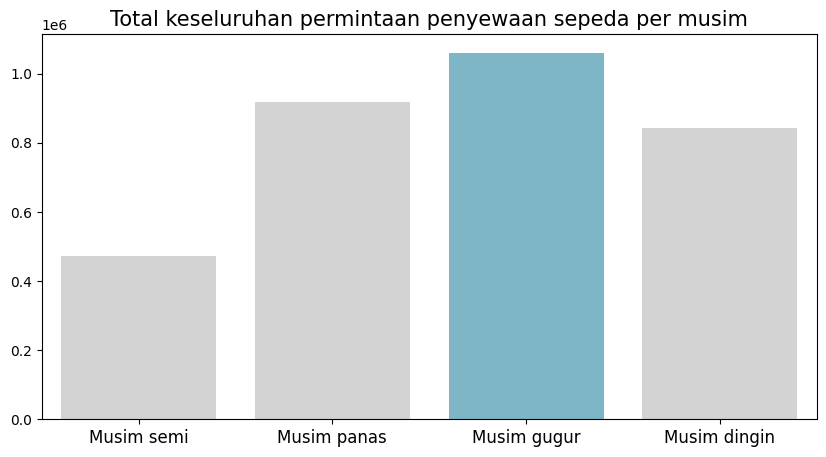

In [51]:
byseason_df = hour_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "count"
}, inplace=True)

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="season",
    data=byseason_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Total keseluruhan permintaan penyewaan sepeda per musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Menunjukkan total keseluruhan permintaan penyewaan sepeda per musim, musim gugur merupakan permintaan penyewaan sepeda tertinggi yang mencapai 1 juta lebih penyewa.

<ipython-input-52-e7f655531023>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


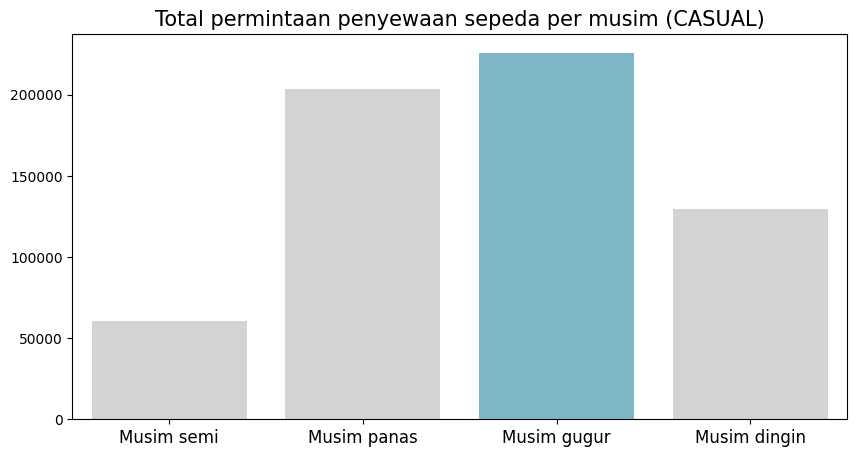

In [52]:
byseason_casual_df = hour_df.groupby(by="season").casual.sum().reset_index()
byseason_casual_df.rename(columns={
    "casual": "casual_count"
}, inplace=True)

colors =  ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="casual_count",
    x="season",
    data=byseason_casual_df.sort_values(by="casual_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda per musim (CASUAL)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-53-6b5a7933731c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


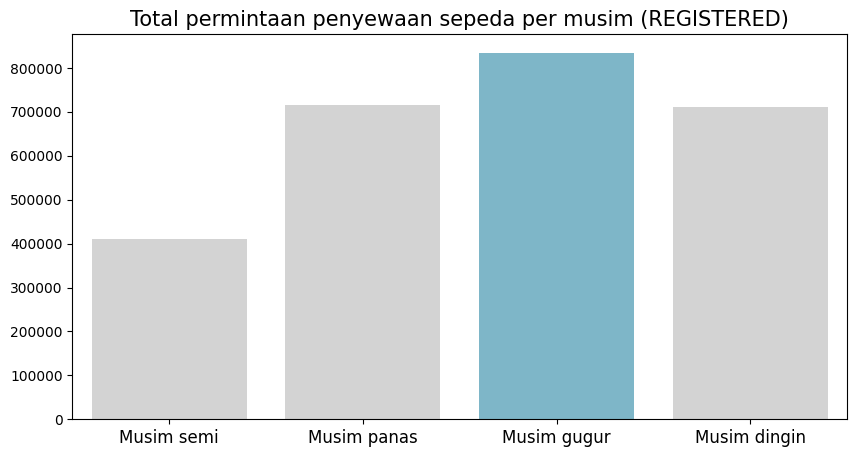

In [53]:
byseason_regi_df = hour_df.groupby(by="season").registered.sum().reset_index()
byseason_regi_df.rename(columns={
    "registered": "regi_count"
}, inplace=True)

colors =  ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="regi_count",
    x="season",
    data=byseason_regi_df.sort_values(by="regi_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda per musim (REGISTERED)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pertanyaan 1: Bagaimana kondisi musim berpengaruh terhadap permintaan penyewaan sepeda? Kondisi musim memiliki dampak yang signifikan terhadap permintaan penyewaan sepeda. Musim gugur cenderung memiliki permintaan penyewaan sepeda tertinggi baik dari pengguna casual maupun pengguna registered.

### Pertanyaan 2: Bagaimana kondisi cuaca berdampak pada permintaan penyewaan sepeda?

<ipython-input-54-53131c2ffcc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


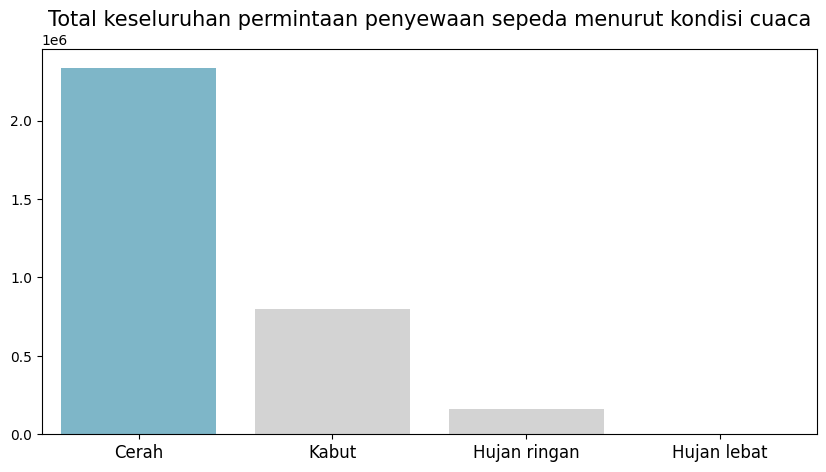

In [54]:
byweathersit_df = hour_df.groupby(by="weathersit").cnt.sum().reset_index()
byweathersit_df.rename(columns={
    "cnt": "count"
}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weathersit",
    data=byweathersit_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Total keseluruhan permintaan penyewaan sepeda menurut kondisi cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Menunjukkan total keseluruhan permintaan penyewaan sepeda per-kondisi cuaca, cuaca cerah merupakan permintaan penyewaan sepeda tertinggi yang mencapai 2 juta lebih penyewa.

<ipython-input-55-031b74e4199f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


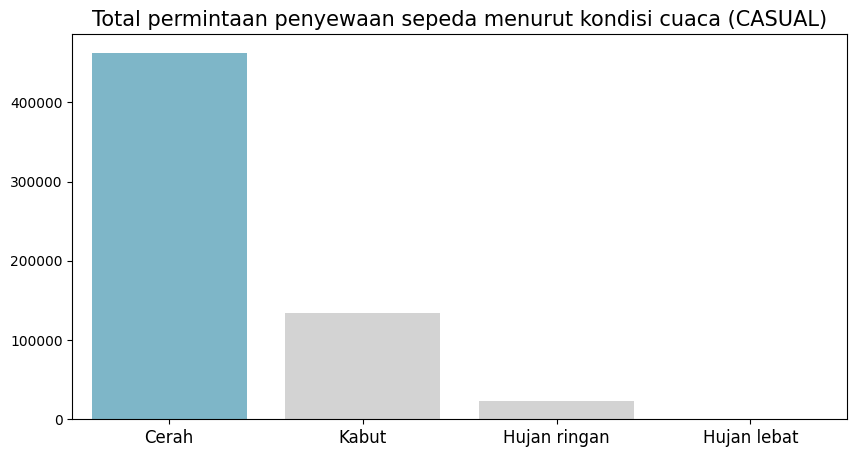

In [55]:
byweathersit_casual_df = hour_df.groupby(by="weathersit").casual.sum().reset_index()
byweathersit_casual_df.rename(columns={
    "casual": "casual_count"
}, inplace=True)

colors =  ["#72BCD4","#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="casual_count",
    x="weathersit",
    data=byweathersit_casual_df.sort_values(by="casual_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda menurut kondisi cuaca (CASUAL)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-56-eb5c227fa136>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


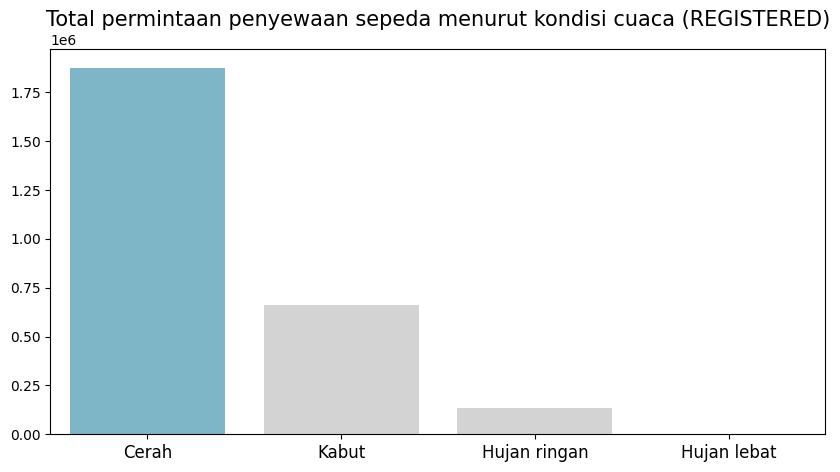

In [56]:
byweathersit_regi_df = hour_df.groupby(by="weathersit").registered.sum().reset_index()
byweathersit_regi_df.rename(columns={
    "registered": "regi_count"
}, inplace=True)

colors =  ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="regi_count",
    x="weathersit",
    data=byweathersit_regi_df.sort_values(by="regi_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda menurut kondisi cuaca (REGISTERED)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pertanyaan 2: Bagaimana kondisi cuaca berdampak pada permintaan penyewaan sepeda? Cuaca yang baik, terutama cuaca cerah, cenderung meningkatkan permintaan penyewaan sepeda. Baik pengguna casual maupun registered lebih memilih menyewa sepeda ketika cuaca cerah.

### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda dalam seminggu?

<ipython-input-57-610ec97e3a0d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-57-610ec97e3a0d>:10: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


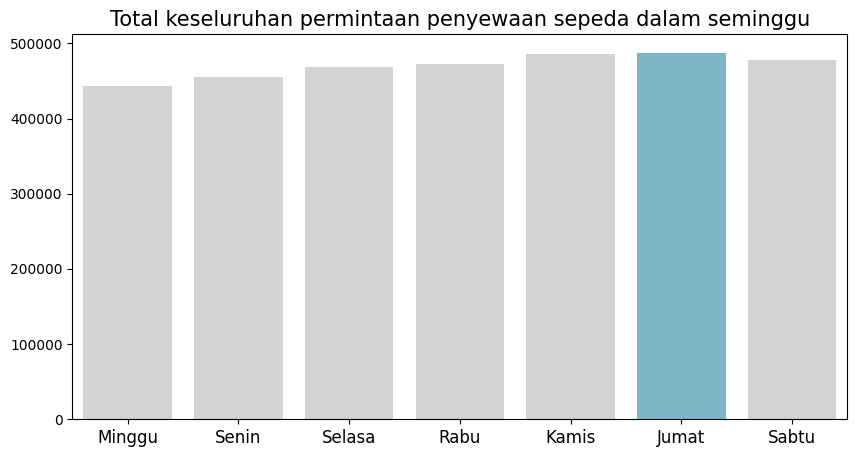

In [57]:
byweekday_df = hour_df.groupby(by="weekday").cnt.sum().reset_index()
byweekday_df.rename(columns={
    "cnt": "count"
}, inplace=True)

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weekday",
    data=byweekday_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Total keseluruhan permintaan penyewaan sepeda dalam seminggu", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Menunjukkan total keseluruhan permintaan penyewaan sepeda dalam seminggu, terlihat cenderung konsisten dari 400000-500000

<ipython-input-58-d56f847a98e0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


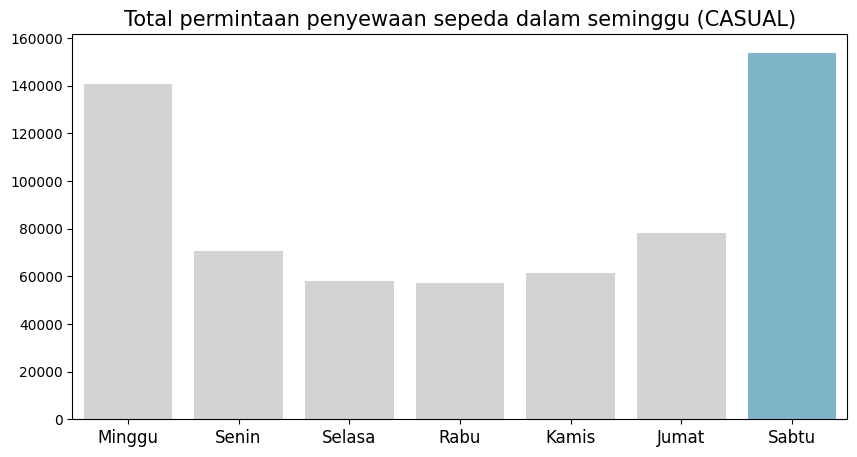

In [58]:
byweekday_casual_df = hour_df.groupby(by="weekday").casual.sum().reset_index()
byweekday_casual_df.rename(columns={
    "casual": "casual_count"
}, inplace=True)

colors =  ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="casual_count",
    x="weekday",
    data=byweekday_casual_df.sort_values(by="casual_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda dalam seminggu (CASUAL)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna casual memiliki permintaan penyewaan sepeda tertinggi pada hari sabtu dan minggu

<ipython-input-59-05a4aeae3835>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-59-05a4aeae3835>:10: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


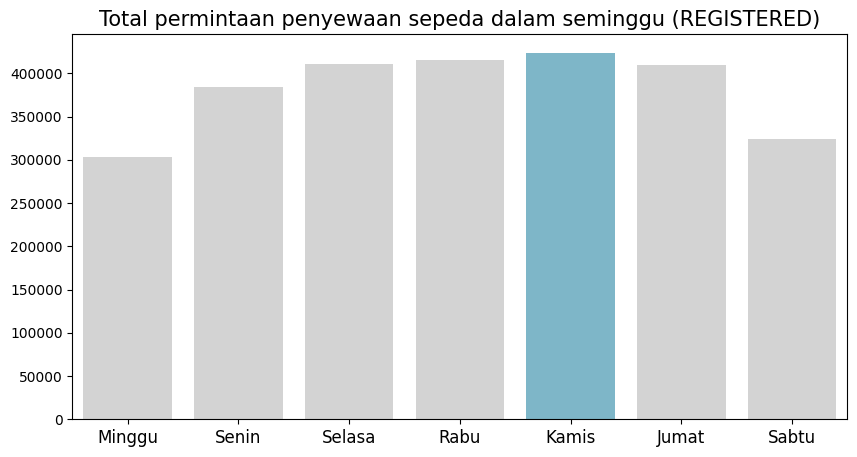

In [59]:
byweekday_regi_df = hour_df.groupby(by="weekday").registered.sum().reset_index()
byweekday_regi_df.rename(columns={
    "registered": "regi_count"
}, inplace=True)

colors =  ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="regi_count",
    x="weekday",
    data=byweekday_regi_df.sort_values(by="regi_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda dalam seminggu (REGISTERED)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna registered memiliki total permintaan penyewaan sepeda cenderung konsisten pada hari kerja (senin-jumat).

Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda dalam seminggu? Selama seminggu, terdapat perbedaan pola penyewaan antara pengguna casual dan registered. Pengguna casual cenderung menyewa sepeda lebih banyak pada akhir pekan (Sabtu dan Minggu). Sementara itu, pengguna registered menunjukkan pola yang lebih konsisten sepanjang hari kerja (Senin-Jumat).

### Pertanyaan 4: Bagaimana pola permintaan penyewaan sepeda berubah sepanjang waktu dalam sehari (misalnya, apakah ada puncak permintaan di pagi atau sore hari)?

<ipython-input-60-d547fa0a23b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


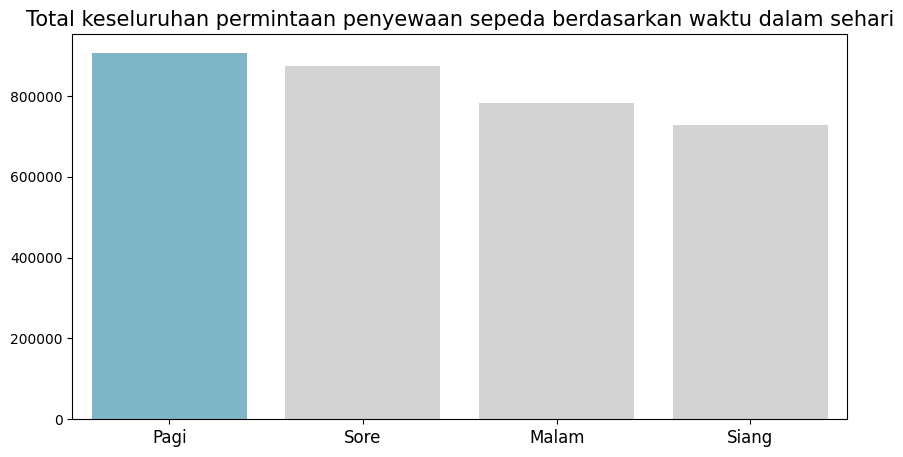

In [60]:
byhr_group_df = hour_df.groupby(by="hr_group").cnt.sum().reset_index()
byhr_group_df.rename(columns={
    "cnt": "count"
}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="hr_group",
    data=byhr_group_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Total keseluruhan permintaan penyewaan sepeda berdasarkan waktu dalam sehari", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Menunjukkan total keseluruhan permintaan penyewaan sepeda berdasarkan waktu dalam sehari, permintaan penyewaan sepeda tertinggi ditunjukkan pada waktu di pagi hari, kemudian sore hari.

<ipython-input-61-ae7ed0ef74f7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


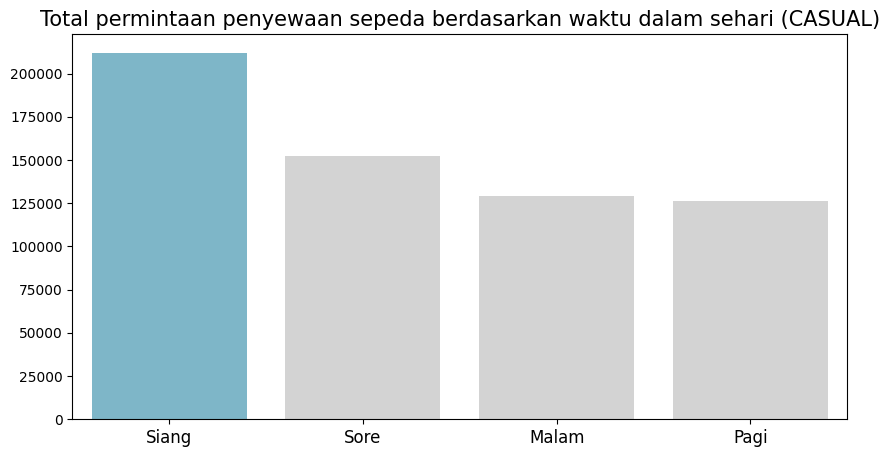

In [61]:
byhr_group_casual_df = hour_df.groupby(by="hr_group").casual.sum().reset_index()
byhr_group_casual_df.rename(columns={
    "casual": "casual_count"
}, inplace=True)

colors =  ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="casual_count",
    x="hr_group",
    data=byhr_group_casual_df.sort_values(by="casual_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda berdasarkan waktu dalam sehari (CASUAL)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-62-7ff2b33479cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


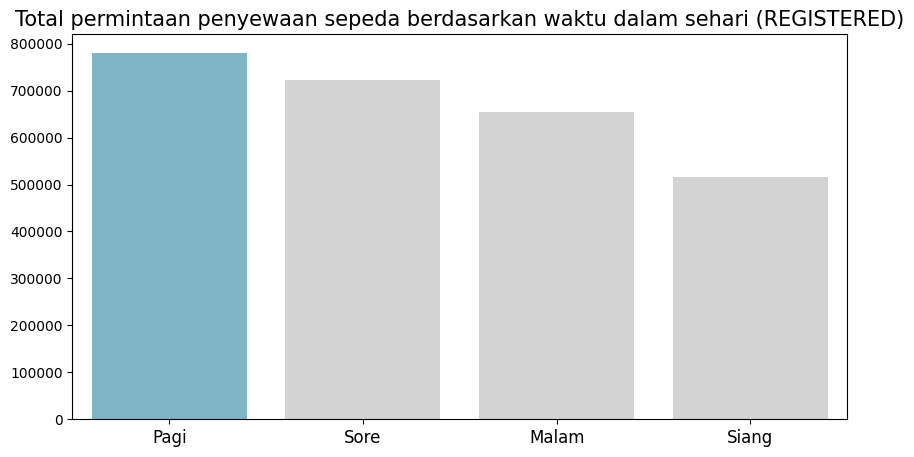

In [62]:
byhr_group_regi_df = hour_df.groupby(by="hr_group").registered.sum().reset_index()
byhr_group_regi_df.rename(columns={
    "registered": "regi_count"
}, inplace=True)

colors =  ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10,5))

sns.barplot(
    y="regi_count",
    x="hr_group",
    data=byhr_group_regi_df.sort_values(by="regi_count", ascending=False),
    palette=colors
)
plt.title("Total permintaan penyewaan sepeda berdasarkan waktu dalam sehari (REGISTERED)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pertanyaan 4: Bagaimana pola permintaan penyewaan sepeda berubah sepanjang waktu dalam sehari (misalnya, apakah ada puncak permintaan di pagi atau sore hari)? Terdapat pola permintaan yang jelas sepanjang hari, dengan puncak permintaan terjadi di pagi dan sore hari. Pengguna casual cenderung lebih aktif menyewa sepeda di siang hari, sementara pengguna registered cenderung lebih sering menyewa sepeda di pagi hari.

## Conclusion

- Conclution pertanyaan 1: Bagaimana kondisi musim memengaruhi permintaan penyewaan sepeda? Kondisi musim memiliki pengaruh signifikan terhadap permintaan penyewaan sepeda. Permintaan tertinggi terjadi pada musim gugur, terutama dari pengguna registered. Musim panas juga menunjukkan permintaan tinggi. Sementara itu, musim semi dan musim dingin cenderung memiliki permintaan yang lebih rendah.
- Conclution pertanyaan 2: Bagaimana kondisi cuaca berdampak pada permintaan penyewaan sepeda?Cuaca cerah cenderung mendorong permintaan penyewaan sepeda tertinggi baik dari pengguna casual maupun registered. Cuaca kabut dan hujan ringan mengurangi permintaan, sementara hujan lebat memiliki dampak negatif yang paling besar terhadap permintaan.
- Conclution pertanyaan 3: Bagaimana perbandingan penyewaan sepeda selama seminggu?Permintaan penyewaan sepeda cenderung lebih tinggi pada akhir pekan, terutama pada hari Sabtu. Pengguna casual lebih aktif pada hari Sabtu dan Minggu, sementara pengguna registered menunjukkan permintaan yang lebih konsisten sepanjang hari kerja.
- Conclution pertanyaan 4: Apakah ada pola khusus dalam permintaan sepeda berdasarkan waktu dalam sehari (misalnya, puncak permintaan pagi dan sore)? Ada pola permintaan sepeda yang jelas berdasarkan waktu dalam sehari, dengan puncak permintaan terjadi pada pagi dan sore hari. Pengguna casual lebih cenderung menyewa sepeda di siang hari, sedangkan pengguna registered lebih sering menyewa sepeda di pagi hari.

Secara keseluruhan, analisis data menunjukkan bahwa permintaan penyewaan sepeda dipengaruhi oleh faktor-faktor seperti musim, cuaca, hari dalam seminggu, dan waktu dalam sehari.